<a href="https://colab.research.google.com/github/mahdisoti/MarketBasketAnalysis_PySpark-/blob/main/MBA_Project_mahdi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the dataset W/Kaggle API and configuring Spark

In [ ]:
# Java8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
# download spark3.0.2
!wget -q http://apache.osuosl.org/spark/spark-3.0.3/spark-3.0.3-bin-hadoop3.2.tgz

In [ ]:
# unzip it
!tar xf spark-3.0.3-bin-hadoop3.2.tgz

tar: spark-3.0.3-bin-hadoop3.2.tgz: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now


In [ ]:
# install findspark 
!pip install -q findspark

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 31 kB/s 
     |████████████████████████████████| 199 kB 42.2 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=2a55f6b005a844737ce09a5f38857c58c9e853f8f2536ffa016a9466e0246e0a
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [ ]:
#Downloading the dataset using the Kaggle API
!pip install kaggle
import os
kaggle_api = {"username":"mahdisoti","key":"6370df14f277931646a0c6a3e06d54d0"}
os.environ['KAGGLE_USERNAME'] = kaggle_api['username']
os.environ['KAGGLE_KEY'] = kaggle_api['key'] 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!kaggle datasets download -d bwandowando/ukraine-russian-crisis-twitter-dataset-1-2-m-rows

100% 11.9G/11.9G [01:21<00:00, 174MB/s]
100% 11.9G/11.9G [01:21<00:00, 156MB/s]


In [ ]:
#Unzipping the dataset
!unzip ukraine-russian-crisis-twitter-dataset-1-2-m-rows

Archive:  ukraine-russian-crisis-twitter-dataset-1-2-m-rows.zip
  inflating: 0819_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0820_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0821_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0822_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0823_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0824_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0825_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0826_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0827_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0828_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0829_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0830_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0831_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0901_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0902_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0903_UkraineCombinedTweetsDeduped.csv.gzip  
  inflat

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
os.listdir()

['.config',
 '0826_UkraineCombinedTweetsDeduped.csv.gzip',
 '0827_UkraineCombinedTweetsDeduped.csv.gzip',
 'UkraineWar',
 '0904_UkraineCombinedTweetsDeduped.csv.gzip',
 '0830_UkraineCombinedTweetsDeduped.csv.gzip',
 '0908_UkraineCombinedTweetsDeduped.csv.gzip',
 '0910_UkraineCombinedTweetsDeduped.csv.gzip',
 '0902_UkraineCombinedTweetsDeduped.csv.gzip',
 '0824_UkraineCombinedTweetsDeduped.csv.gzip',
 '0821_UkraineCombinedTweetsDeduped.csv.gzip',
 '0907_UkraineCombinedTweetsDeduped.csv.gzip',
 '0822_UkraineCombinedTweetsDeduped.csv.gzip',
 '0829_UkraineCombinedTweetsDeduped.csv.gzip',
 '0909_UkraineCombinedTweetsDeduped.csv.gzip',
 '0905_UkraineCombinedTweetsDeduped.csv.gzip',
 '0823_UkraineCombinedTweetsDeduped.csv.gzip',
 '0914_UkraineCombinedTweetsDeduped.csv.gzip',
 '0913_UkraineCombinedTweetsDeduped.csv.gzip',
 '0825_UkraineCombinedTweetsDeduped.csv.gzip',
 'ukraine-russian-crisis-twitter-dataset-1-2-m-rows.zip',
 '0828_UkraineCombinedTweetsDeduped.csv.gzip',
 '0911_UkraineCombined

In [ ]:
import os
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import functools
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import SQLContext
from pyspark.sql.functions import regexp_replace, trim, col, lower
from pyspark.ml.feature import Tokenizer, StopWordsRemover
from pyspark.sql.functions import trim,split,explode,col
from pyspark.sql.functions import expr
from pyspark.sql.functions import udf, array_distinct
from pyspark.sql.types import ArrayType,StringType
from pyspark.sql.types import StructType,StructField
import time
from tqdm import tqdm
from pyspark.ml.fpm import FPGrowth
from pyspark.sql.types import StructType,StructField

## Data pre-processing

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
os.listdir()

['.config',
 '0826_UkraineCombinedTweetsDeduped.csv.gzip',
 '0827_UkraineCombinedTweetsDeduped.csv.gzip',
 'UkraineWar',
 '0904_UkraineCombinedTweetsDeduped.csv.gzip',
 '0830_UkraineCombinedTweetsDeduped.csv.gzip',
 '0908_UkraineCombinedTweetsDeduped.csv.gzip',
 '0910_UkraineCombinedTweetsDeduped.csv.gzip',
 '0902_UkraineCombinedTweetsDeduped.csv.gzip',
 '0824_UkraineCombinedTweetsDeduped.csv.gzip',
 '0821_UkraineCombinedTweetsDeduped.csv.gzip',
 '0907_UkraineCombinedTweetsDeduped.csv.gzip',
 '0822_UkraineCombinedTweetsDeduped.csv.gzip',
 '0829_UkraineCombinedTweetsDeduped.csv.gzip',
 '0909_UkraineCombinedTweetsDeduped.csv.gzip',
 '0905_UkraineCombinedTweetsDeduped.csv.gzip',
 '0823_UkraineCombinedTweetsDeduped.csv.gzip',
 '0914_UkraineCombinedTweetsDeduped.csv.gzip',
 '0913_UkraineCombinedTweetsDeduped.csv.gzip',
 '0825_UkraineCombinedTweetsDeduped.csv.gzip',
 'ukraine-russian-crisis-twitter-dataset-1-2-m-rows.zip',
 '0828_UkraineCombinedTweetsDeduped.csv.gzip',
 '0911_UkraineCombined

In [ ]:
data_to_read =[
 '0904_UkraineCombinedTweetsDeduped.csv.gzip',
 '0908_UkraineCombinedTweetsDeduped.csv.gzip',
 '0910_UkraineCombinedTweetsDeduped.csv.gzip',
 '0902_UkraineCombinedTweetsDeduped.csv.gzip',
 '0907_UkraineCombinedTweetsDeduped.csv.gzip',
 '0909_UkraineCombinedTweetsDeduped.csv.gzip',
 '0905_UkraineCombinedTweetsDeduped.csv.gzip',
 '0914_UkraineCombinedTweetsDeduped.csv.gzip',
 '0913_UkraineCombinedTweetsDeduped.csv.gzip'
 ]

In [ ]:
data_collection = []

columns = ["userid","text","language"]

for data in data_to_read:


  df = pd.read_csv(data, compression='gzip', index_col=0,encoding='utf-8', quoting=csv.QUOTE_ALL, low_memory=False)
  df= df[columns]
  data_collection.append(df)
  print(f"The data {data} has {len(df)} number of rows ")


The data 0904_UkraineCombinedTweetsDeduped.csv.gzip has 40151 number of rows 
The data 0908_UkraineCombinedTweetsDeduped.csv.gzip has 47830 number of rows 
The data 0910_UkraineCombinedTweetsDeduped.csv.gzip has 64953 number of rows 
The data 0902_UkraineCombinedTweetsDeduped.csv.gzip has 53668 number of rows 
The data 0907_UkraineCombinedTweetsDeduped.csv.gzip has 46496 number of rows 
The data 0909_UkraineCombinedTweetsDeduped.csv.gzip has 70401 number of rows 
The data 0905_UkraineCombinedTweetsDeduped.csv.gzip has 44695 number of rows 
The data 0914_UkraineCombinedTweetsDeduped.csv.gzip has 75392 number of rows 
The data 0913_UkraineCombinedTweetsDeduped.csv.gzip has 63866 number of rows 


In [ ]:
df_all = pd.concat(data_collection, axis=0)
df_all.shape

(507452, 3)

In [ ]:
def pre_processing(data,column):

  print("initial shape of the data",data.shape)

  data.drop_duplicates(subset=["text"],keep="last",inplace=True)

  print("shape of the data after dropping retweets", data.shape)

  data = data[data["language"]=="en"]

  print("shape of the data after filtering english tweets:", data.shape)


  #convert the dataset into spark dataframe



  spark = SparkSession.builder.enableHiveSupport().getOrCreate()
  spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", "true")
  sc = spark.sparkContext 

  sparkDataset=spark.createDataFrame(df_all) 
  sparkDataset.createOrReplaceTempView("spark_sql_sesion")  

  sparkDataset = sparkDataset.select("userid",lower(trim(regexp_replace(column,'\\p{Punct}',''))).alias("text"))

  print(sparkDataset.columns)

  tokenizer = Tokenizer(inputCol='text', outputCol='tokens')
  sparkDataset = sparkDataset.withColumn("text", trim(col("text")))
  sparkDataset = tokenizer.transform(sparkDataset)

  remover = StopWordsRemover(inputCol='tokens', outputCol='tokenClean')
  sparkDataset = remover.transform(sparkDataset).select("userid","text",'tokenClean') 

  sparkDataset = sparkDataset.withColumn("tokenClean", array_distinct(col("tokenClean")))

  sparkDataset = sparkDataset.withColumn("tokenClean", expr("filter(tokenClean, elem -> elem != '')"))



  return sparkDataset

In [ ]:
spark_dataframe = pre_processing(df_all,"text")
spark_dataframe.show(truncate=False)

initial shape of the data (507452, 3)
shape of the data after dropping retweets (497036, 3)
shape of the data after filtering english tweets: (247227, 3)
['userid', 'text']
+-------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
spark_dataframe = spark_dataframe.drop("userid")
spark_dataframe.show()

+--------------------+--------------------+
|                text|          tokenClean|
+--------------------+--------------------+
|a raytheontech su...|[raytheontech, su...|
|rusia  algo más d...|[rusia, algo, más...|
|explosion in cher...|[explosion, chern...|
|panoramatvp2  ros...|[panoramatvp2, ro...|
|ukraines nuclear ...|[ukraines, nuclea...|
|rússia mantém ole...|[rússia, mantém, ...|
|gå i deg selv put...|[gå, deg, selv, p...|
|disclosetv bjcoll...|[disclosetv, bjco...|
|gazprom de rusia ...|[gazprom, de, rus...|
|10 thousand milli...|[10, thousand, mi...|
|schroeder mention...|[schroeder, menti...|
|🌽 ucrania l ha e...|[🌽, ucrania, l, ...|
|guillau15264609 p...|[guillau15264609,...|
|as reagan said we...|[reagan, said, sh...|
|‼️🇺🇦exclusive w...|[‼️🇺🇦exclusive,...|
|trumpstolethedocs...|[trumpstolethedoc...|
|all clear 0409202...|[clear, 04092022,...|
|there are several...|[several, ways, e...|
|standwithus shaar...|[standwithus, sha...|
|rusia consider th...|[rusia, consider

## FP-growth Algorithm implementation for finding the large itemsets

In [ ]:
np.random.seed(1)



threshold = [0.01,0.02,0.03,0.04,0.05]
time_elapsed = {}

for soglia in tqdm( threshold ):


  fpGrowth = FPGrowth(itemsCol="tokenClean", minSupport = soglia)

  # compute time difference
  start_time = time.time()
  model = fpGrowth.fit(spark_dataframe)

  time_elapsed[soglia] = time.time() - start_time

100%|██████████| 5/5 [06:26<00:00, 77.24s/it]


In [ ]:
time_elapsed

{0.01: 94.69298529624939,
 0.02: 74.18501687049866,
 0.03: 74.96248650550842,
 0.04: 71.58879590034485,
 0.05: 70.64629673957825}

In [ ]:
spark = SparkSession.builder.enableHiveSupport().getOrCreate()
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", "true")
sc = spark.sparkContext

time_elapsed_df = spark.createDataFrame(time_elapsed.items(), 
                      schema=StructType(fields=[
                          StructField("Threshold", StringType()), 
                          StructField("Time Elapsed(seconds)", StringType())]))
time_elapsed_df.show()

+---------+---------------------+
|Threshold|Time Elapsed(seconds)|
+---------+---------------------+
|     0.01|    94.69298529624939|
|     0.02|    74.18501687049866|
|     0.03|    74.96248650550842|
|     0.04|    71.58879590034485|
|     0.05|    70.64629673957825|
+---------+---------------------+



In [ ]:
# Try different fraction of the dataframe
sample_size = [0.1,0.3,0.5,0.7,0.9]
time_elapsed_fraction = {}
for fraction in tqdm(sample_size):
    # extract a fraction of the dataframe
    df_fraction = spark_dataframe.sample(False, fraction, seed = 1)
    fpGrowth = FPGrowth(itemsCol = 'tokenClean', minSupport = 0.02)
    start_time = time.time()
    model = fpGrowth.fit(df_fraction)   
    time_elapsed_fraction[fraction] = time.time() - start_time

100%|██████████| 5/5 [02:46<00:00, 33.33s/it]


In [ ]:
time_elapsed_fraction_df = spark.createDataFrame(time_elapsed_fraction.items(), 
                      schema=StructType(fields=[
                          StructField("Fraction", StringType()), 
                          StructField("Time Elapsed(seconds)", StringType())]))


time_elapsed_fraction_df.show()

+--------+---------------------+
|Fraction|Time Elapsed(seconds)|
+--------+---------------------+
|     0.1|    18.47211527824402|
|     0.3|   24.944506883621216|
|     0.5|    30.45950198173523|
|     0.7|     41.0325665473938|
|     0.9|    51.61330533027649|
+--------+---------------------+



In [ ]:
np.random.seed(1)

fpGrowth = FPGrowth(itemsCol="tokenClean", minSupport = 0.01)
model = fpGrowth.fit(spark_dataframe)
association_rules = model.associationRules
frequent_items = model.freqItemsets

In [ ]:
frequent_items.orderBy("freq",ascending=False).show(10,truncate=False)

+------------------+------+
|items             |freq  |
+------------------+------+
|[ukraine]         |142688|
|[russia]          |78553 |
|[putin]           |52010 |
|[russian]         |37730 |
|[russia, ukraine] |33743 |
|[la]              |33445 |
|[de]              |32646 |
|[ukrainerussiawar]|27558 |
|[queenelizabeth]  |27136 |
|[biden]           |26866 |
+------------------+------+
only showing top 10 rows



In [ ]:
association_rules.show(10,truncate=False)

+----------------------+----------------+------------------+------------------+--------------------+
|antecedent            |consequent      |confidence        |lift              |support             |
+----------------------+----------------+------------------+------------------+--------------------+
|[en, la]              |[de]            |0.8311676343194175|12.654543781522577|0.018145566920705944|
|[born, shutdown]      |[pink]          |0.9986784972626015|83.38302798007969 |0.010643092250863117|
|[born]                |[pink]          |0.9523888796404195|79.51815205458685 |0.01151023265920376 |
|[born]                |[day2tobornpink]|0.8540036623938738|81.23838551992372 |0.010321183978625291|
|[born]                |[shutdown]      |0.8818045613450974|39.53889147070112 |0.01065717573777352 |
|[day2tobornpink, born]|[pink]          |0.9992202729044835|83.42826265132754 |0.010313136271819345|
|[day2tobornpink, pink]|[born]          |0.9955331132258691|82.37319734731697 |0.0103131362

In [ ]:
frequent_items.count()

213

In [ ]:
association_rules.count()

18

In [ ]:
fp_th_pd = time_elapsed_df.toPandas()

fp_frac_pd = time_elapsed_fraction_df.toPandas()

fp_frac_pd["Time Elapsed(seconds)"] = fp_frac_pd["Time Elapsed(seconds)"].apply(lambda x: round((float(x)),2))

In [ ]:
fp_th_pd["Threshold"] = pd.to_numeric(fp_th_pd["Threshold"])
fp_th_pd["Time Elapsed(seconds)"] = pd.to_numeric(fp_th_pd["Time Elapsed(seconds)"])

Text(0, 0.5, 'Seconds')

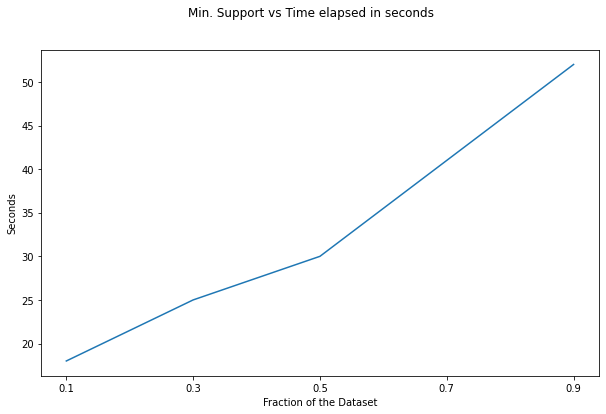

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10,6]

fig = plt.figure()
plt.plot(fp_frac_pd["Fraction"],np.round(fp_frac_pd["Time Elapsed(seconds)"]))
fig.suptitle('Min. Support vs Time elapsed in seconds')
plt.xlabel('Fraction of the Dataset')
plt.ylabel('Seconds')

Text(0, 0.5, 'Seconds')

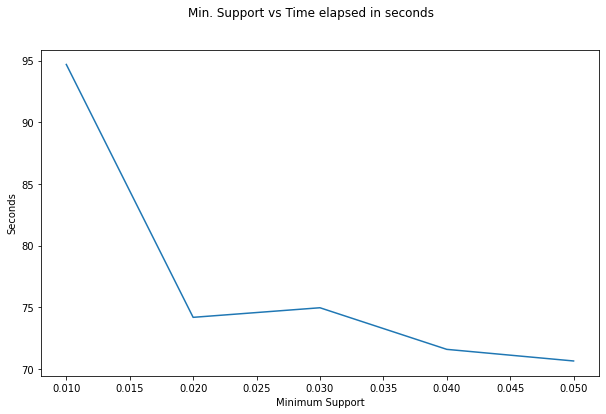

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10,6]

fig = plt.figure()
plt.plot(fp_th_pd["Threshold"],fp_th_pd["Time Elapsed(seconds)"])
fig.suptitle('Min. Support vs Time elapsed in seconds')
plt.xlabel('Minimum Support')
plt.ylabel('Seconds')